<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Imports</h2>
</div>


In [1]:
%pip install --upgrade pip
%pip uninstall -y numpy pandas scipy
%pip install numpy==1.21.0 pandas==1.3.0 scipy==1.7.0
%pip install --upgrade matplotlib seaborn opencv-python-headless tensorflow tqdm prettytable ipywidgets pillow scikit-learn splitfolders
%pip install opencv-python-headless
%pip install tensorflow
%pip install tqdm
%pip install scikit-learn


Found existing installation: numpy 1.26.4Note: you may need to restart the kernel to use updated packages.

Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.14.0
Uninstalling scipy-1.14.0:
  Successfully uninstalled scipy-1.14.0
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pandas-1.3.0.tar.gz (4.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [239 lines of output]
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm6

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


  Using cached numpy-2.0.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.0.1-cp310-cp310-win_amd64.whl (16.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.1 requires scipy>=1.6.0, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.1 which is incompatible.



  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.1 requires scipy>=1.6.0, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.


Note: you may need to restart the kernel to use updated packages.
  Using cached scipy-1.14.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp310-cp310-win_amd64.whl (44.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas numpy matplotlib seaborn opencv-python-headless tensorflow tqdm scikit-learn prettytable ipywidgets pillow



  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import splitfolders
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Seed</h2>
</div>


In [5]:
tf.random.set_seed(42)
# np.rando.set_seed(42)

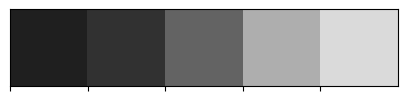

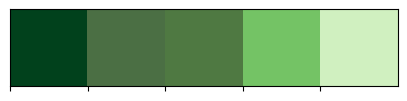

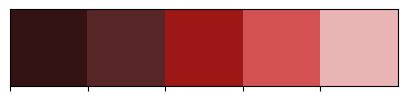

In [6]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Data Import and split 80-20</h2>
</div>


In [7]:
labels = ['glioma','notumor','meningioma','pituitary']

In [8]:
TRAIN_DIR = r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\MedicalImages\\Training'
splitfolders.ratio(TRAIN_DIR, output="DataSplit", ratio=(0.8, 0.2))

Copying files: 5712 files [00:13, 436.32 files/s]


In [9]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','x_train80%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
  
 
    
X_val = []
y_val = []
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','y_train20%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(i)
        

X_test = []
y_test = []
        
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\MedicalImages\\','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 300/300 [00:01<00:00, 295.56it/s]


In [10]:
print('Training 80%')
print(X_train.shape)
print('Training 20%')
print(X_val.shape)
print('Test')
print(X_test.shape)

Training 80%
(4568, 150, 150, 3)
Training 20%
(1144, 150, 150, 3)
Test
(1311, 150, 150, 3)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Show train data in charts</h2>
</div>

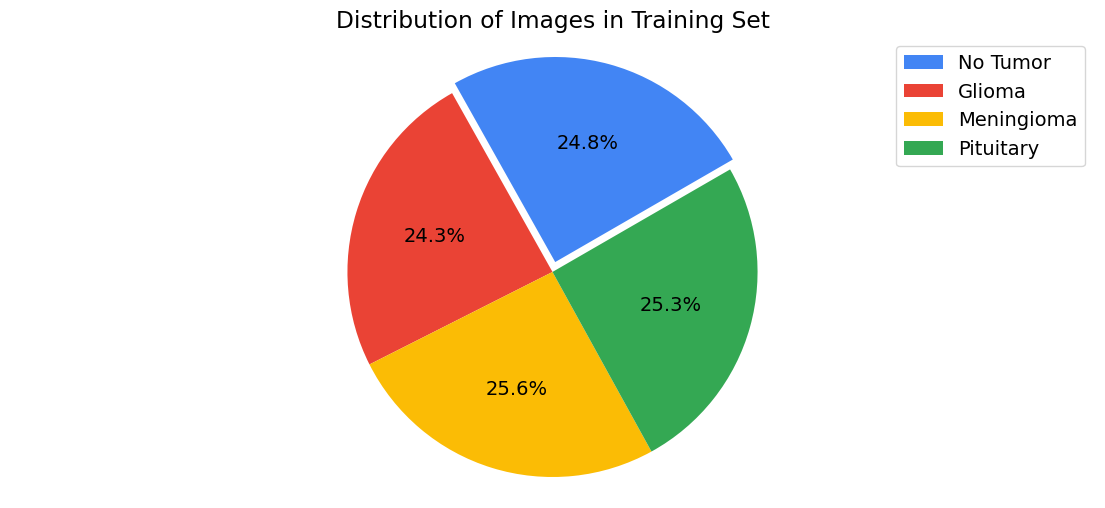

In [11]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\x_train80%\\notumor')
glioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\DataSplit\\x_train80%\\glioma')
meningioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\x_train80%\\meningioma')
pituitary_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\x_train80%\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Training Set')
plt.show()


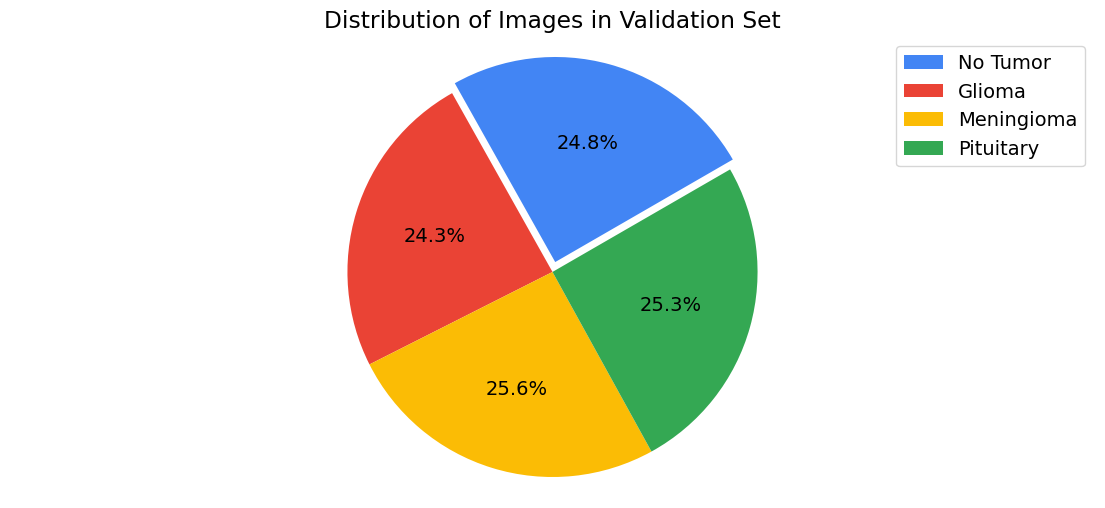

In [12]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\y_train20%\\notumor')
glioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\DataSplit\\y_train20%\\glioma')
meningioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\y_train20%\\meningioma')
pituitary_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\y_train20%\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Validation Set')
plt.show()

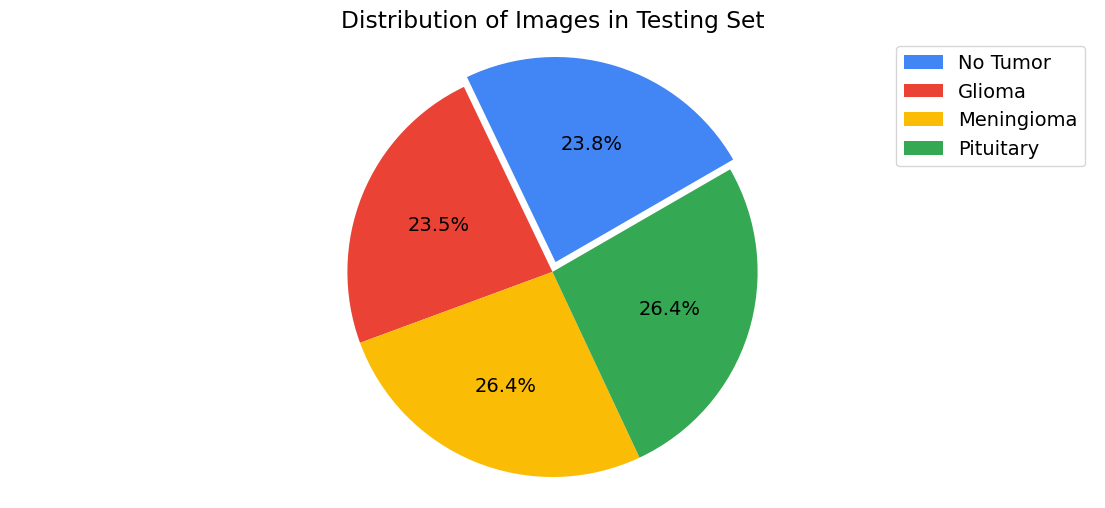

In [13]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'C:\Users\eduma\OneDrive\Escritorio\CA3\StrategicThinkingCA3-\\MedicalImages\Testing\\notumor')
glioma_count = len(r'C:\Users\eduma\OneDrive\Escritorio\CA3\StrategicThinkingCA3-\\MedicalImages\Testing\\glioma')
meningioma_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\MedicalImages\\Testing\\meningioma')
pituitary_count = len(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\\MedicalImages\\Testing\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Testing Set')
plt.show()

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">One-Hot Encoding</h2>
</div>


In [16]:
labels = ['glioma','notumor','meningioma','pituitary']

In [17]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)
y_val_new = []
for i in y_val:
 y_val_new.append(labels.index(i))
y_val = tf.keras.utils.to_categorical(y_val_new)
y_test_new = []
for i in y_test:
 y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)


In [18]:

# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_val_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255.
X_val_scaled /= 255.
X_test_scaled /= 255.


In [19]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

0
255
0.0
1.0


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Generic values</h2>
</div>


In [20]:
batch_size = 32              # Batch size for training and validation
num_classes = 4             # Number of classes in the dataset

In [21]:
datagen = ImageDataGenerator(horizontal_flip=True)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50</h2>
</div>


In [22]:
# Loading the pre-trained ResNet50 model without the top classification layer
res_model = ResNet50(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in res_model.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [23]:
# Defining the checkpoint
filepath = "weightsbestTesNet50100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [24]:
historyres = model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
validation_data=(X_val_scaled, y_val),
batch_size=32,
epochs=20,
callbacks=callbacks_list)


Epoch 1/20


c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.5030 - loss: 1.3324
Epoch 1: val_categorical_accuracy improved from -inf to 0.74213, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - categorical_accuracy: 0.5037 - loss: 1.3301 - val_categorical_accuracy: 0.7421 - val_loss: 0.6717
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7269 - loss: 0.6891
Epoch 2: val_categorical_accuracy improved from 0.74213 to 0.79545, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - categorical_accuracy: 0.7269 - loss: 0.6891 - val_categorical_accuracy: 0.7955 - val_loss: 0.5578
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7543 - loss: 0.6122
Epoch 3: val_categorical_accuracy did not improve from 0.79545
143/143 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - categorical_accuracy: 0.7543 - loss: 0.6122 - val_categorical_accuracy: 0.7124 - val_loss: 0

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">VGG16</h2>
</div>


In [25]:
# Loading the pre-trained VGG16 model without the top classification layer
v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in v.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(v)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Defining the checkpoint
filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fitting the model
historyVGG16 = model.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6549 - loss: 0.8316
Epoch 1: val_categorical_accuracy improved from -inf to 0.88112, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - categorical_accuracy: 0.6557 - loss: 0.8300 - val_categorical_accuracy: 0.8811 - val_loss: 0.3651
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8646 - loss: 0.3971
Epoch 2: val_categorical_accuracy did not improve from 0.88112
143/143 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - categorical_accuracy: 0.8646 - loss: 0.3970 - val_categorical_accuracy: 0.8741 - val_loss: 0.3801
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8799 - loss: 0.3313
Epoch 3: val_categorical_accuracy improved from 0.88112 to 0.89248, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - categorical_accuracy: 0.8799 - loss: 0.3312 - val_categorical_accuracy: 0.8925 - val_lo

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50 V2</h2>
</div>

In [26]:

rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
for layer in rsv2.layers:
    layer.trainable = False

modelrsv2 = Sequential()
modelrsv2.add(rsv2)
modelrsv2.add(Flatten())
modelrsv2.add(Dense(4, activation='softmax'))

modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# checkpoint
filepath = "weightsbestResNet50V2100%scaled.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

historyrsv2 = modelrsv2.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - categorical_accuracy: 0.7238 - loss: 2.4449
Epoch 1: val_categorical_accuracy improved from -inf to 0.88287, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - categorical_accuracy: 0.7242 - loss: 2.4421 - val_categorical_accuracy: 0.8829 - val_loss: 1.3009
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - categorical_accuracy: 0.8608 - loss: 1.3227
Epoch 2: val_categorical_accuracy improved from 0.88287 to 0.88986, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - categorical_accuracy: 0.8609 - loss: 1.3229 - val_categorical_accuracy: 0.8899 - val_loss: 1.4849
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - categorical_accuracy: 0.8782 - loss: 1.2020
Epoch 3: val_categorical_accuracy did not improve from 0.88986
143/143 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - categorical_accuracy: 0.8781 - loss: 1.2027 - val_categorical_accura

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ENV2B0</h2>
</div>

In [28]:
# DefinING the model
env2b0 = EfficientNetV2B0(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False, include_preprocessing=False)
for layer in env2b0.layers:
    layer.trainable = False

modelenv2b0 = Sequential()
modelenv2b0.add(env2b0)
modelenv2b0.add(Flatten())
modelenv2b0.add(Dense(4, activation='softmax'))

modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Checkpoint
filepath = "weightsbestENV2B0100%scaled.keras"  # .keras extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fitting the model
historyenv2b0 = modelenv2b0.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - categorical_accuracy: 0.7044 - loss: 1.1026
Epoch 1: val_categorical_accuracy improved from -inf to 0.87325, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 130s 774ms/step - categorical_accuracy: 0.7050 - loss: 1.1001 - val_categorical_accuracy: 0.8733 - val_loss: 0.5317
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - categorical_accuracy: 0.8492 - loss: 0.5511
Epoch 2: val_categorical_accuracy improved from 0.87325 to 0.91171, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 111s 764ms/step - categorical_accuracy: 0.8493 - loss: 0.5512 - val_categorical_accuracy: 0.9117 - val_loss: 0.4074
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - categorical_accuracy: 0.8752 - loss: 0.4986
Epoch 3: val_categorical_accuracy improved from 0.91171 to 0.93007, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 83s 568ms/step - categorical_a

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Personalized</h2>
</div>

In [30]:
modelP = Sequential()
modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
modelP.add(Dense(4, activation='softmax'))

modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Define the name of the file for saving the models
filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
historyPers = modelP.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - categorical_accuracy: 0.3633 - loss: 4.1977
Epoch 1: val_categorical_accuracy improved from -inf to 0.45979, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 435ms/step - categorical_accuracy: 0.3636 - loss: 4.1877 - val_categorical_accuracy: 0.4598 - val_loss: 1.5976
Epoch 2/20
140/143 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - categorical_accuracy: 0.4419 - loss: 1.6890
Epoch 2: val_categorical_accuracy improved from 0.45979 to 0.55769, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 275ms/step - categorical_accuracy: 0.4415 - loss: 1.6907 - val_categorical_accuracy: 0.5577 - val_loss: 1.3095
Epoch 3/20
141/143 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - categorical_accuracy: 0.4568 - loss: 1.8531
Epoch 3: val_categorical_accuracy did not improve from 0.55769
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - categorical_accuracy: 0.4566 - loss: 1.8540 - val_categorical_accuracy: 0.542

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Predictions</h2>
</div>

In [31]:

modelpred1 = load_model('weightsbestTesNet50100%scaled.keras')

modelpred2 = load_model('weightsbestVGG16100%scaled.keras')

modelpred3 = load_model('weightsbestResNet50V2100%scaled.keras')

modelpred4 = load_model('weightsbestENV2B0100%scaled.keras')

modelpred5 = load_model('weightsbestPersonal100%scaled.keras')


AttributeError: Exception encountered when calling Flatten.call().

[1m'list' object has no attribute 'shape'[0m

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 5, 5, 2048), dtype=float32, sparse=False, name=keras_tensor_1309>'],)
  • kwargs=<class 'inspect._empty'>

In [ ]:
# Obtening Original labels for testing
y_true = np.argmax(y_test,axis=1)

# Labels de TesNet50100
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)
# Labels de VGG16100
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)
# Labels de ResNet50V2100
y_pred3 = modelpred3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred3,axis=1)
# Labels de ENV2B0100
y_pred4 = modelpred4.predict(X_test_scaled)
y_pred4 = np.argmax(y_pred4,axis=1)
# Labels de Personal
y_pred5 = modelpred5.predict(X_test_scaled)
y_pred5= np.argmax(y_pred5,axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 408ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


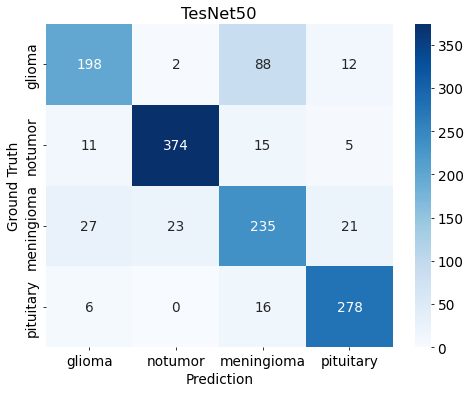

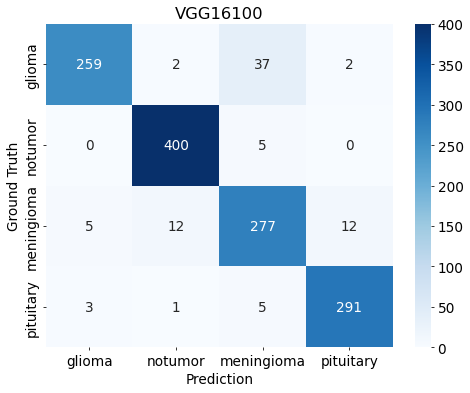

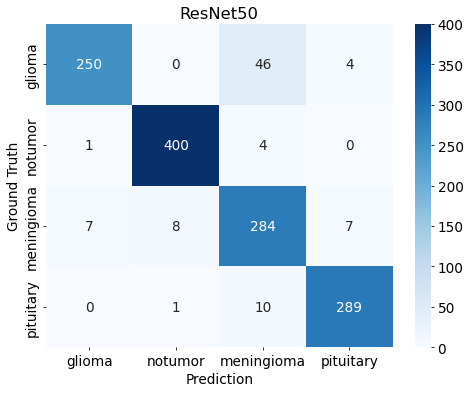

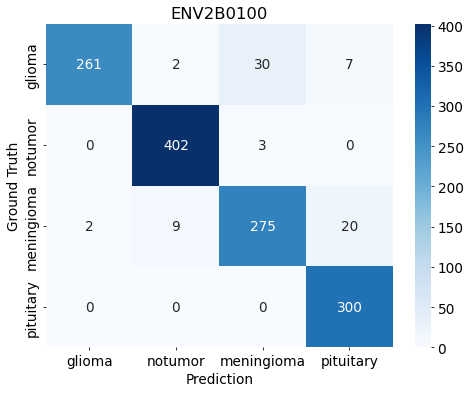

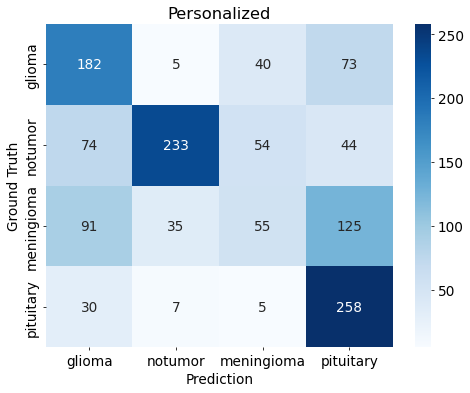

In [ ]:

cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('TesNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ResNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred4)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred5)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Personalized')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('TesNet50' + classification_report(y_true, y_pred1))
print('-------------------------------------------------------------------------')
print('VGG16100' + classification_report(y_true, y_pred2))
print('-------------------------------------------------------------------------')
print('ResNet50' + classification_report(y_true, y_pred3))
print('-------------------------------------------------------------------------')
print('ENV2B0' + classification_report(y_true, y_pred4))
print('-------------------------------------------------------------------------')
print('Personalized' + classification_report(y_true, y_pred5))
print('--------------------------------------------------')

TesNet50              precision    recall  f1-score   support

           0       0.82      0.66      0.73       300
           1       0.94      0.92      0.93       405
           2       0.66      0.77      0.71       306
           3       0.88      0.93      0.90       300

    accuracy                           0.83      1311
   macro avg       0.82      0.82      0.82      1311
weighted avg       0.83      0.83      0.83      1311

-------------------------------------------------------------------------
VGG16100              precision    recall  f1-score   support

           0       0.97      0.86      0.91       300
           1       0.96      0.99      0.98       405
           2       0.85      0.91      0.88       306
           3       0.95      0.97      0.96       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311

----------------------------------------

In [ ]:
# Columnas de la tabla
t = PrettyTable(['Model', 'Accuracy', 'glioma','meningioma', 'notumor', 'pituitary'])
# To insert rows:
t.add_row(['TesNet50', 0.83,0.82,0.94,0.66,0.88])
t.add_row(['VGG16100', 0.94,0.97,0.96,0.85,0.95 ])
t.add_row(['ResNet50', 0.94,0.97,0.98,0.83,0.96])
t.add_row(['ENV2B', 0.95,0.99,0.97,0.89,0.92])
t.add_row(['Personalized', 0.57,0.48,0.83,0.36,0.52 ])
print(t)


+--------------+----------+--------+------------+---------+-----------+
|    Model     | Accuracy | glioma | meningioma | notumor | pituitary |
+--------------+----------+--------+------------+---------+-----------+
|   TesNet50   |   0.83   |  0.82  |    0.94    |   0.66  |    0.88   |
|   VGG16100   |   0.94   |  0.97  |    0.96    |   0.85  |    0.95   |
|   ResNet50   |   0.94   |  0.97  |    0.98    |   0.83  |    0.96   |
|    ENV2B     |   0.95   |  0.99  |    0.97    |   0.89  |    0.92   |
| Personalized |   0.57   |  0.48  |    0.83    |   0.36  |    0.52   |
+--------------+----------+--------+------------+---------+-----------+


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Data Import and split 70-30</h2>
</div>

In [ ]:
TRAIN_DIR = r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\StrategicThinkingCA3-\\StrategicThinkingCA3\\MedicalImages\\Training'
splitfolders.ratio(TRAIN_DIR, output="DataSplit", ratio=(0.7, 0.3))

Copying files: 5712 files [00:22, 254.12 files/s]


In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','x_train70%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
  
 
    
X_val = []
y_val = []
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\DataSplit\\','y_train30%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(i)
        

X_test = []
y_test = []
        
for i in labels:
    folderPath = os.path.join(r'C:\\Users\\eduma\\OneDrive\\Escritorio\\CA3\\StrategicThinkingCA3-\\MedicalImages\\','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\\\Users\\\\eduma\\\\OneDrive\\\\Escritorio\\\\CA3\\\\StrategicThinkingCA3-\\\\StrategicThinkingCA3\\\\DataSplit\\\\x_train70%\\No Tumor'

In [ ]:
print('Training 70%')
print(X_train.shape)
print('Training 30%')
print(X_val.shape)
print('Test')
print(X_test.shape)

Training 70%
(4568, 150, 150, 3)
Training 30%
(1144, 150, 150, 3)
Test
(1311, 150, 150, 3)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">One-Hot Encoding</h2>
</div>

In [ ]:
y_train_new = []
for i in y_train:
 y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)
y_val_new = []
for i in y_val:
 y_val_new.append(labels.index(i))
y_val = tf.keras.utils.to_categorical(y_val_new)
y_test_new = []
for i in y_test:
 y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)

In [ ]:
# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_val_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255.
X_val_scaled /= 255.
X_test_scaled /= 255.

In [ ]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

0
255
0.0
1.0


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50</h2>
</div>


In [ ]:
# Loading the pre-trained ResNet50 model without the top classification layer
res_model = ResNet50(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in res_model.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
# Defining the checkpoint
filepath = "weightsbestTesNet50100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
historyres = model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
validation_data=(X_val_scaled, y_val),
batch_size=32,
epochs=20,
callbacks=callbacks_list)

Epoch 1/20


c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.4588 - loss: 1.3034
Epoch 1: val_categorical_accuracy improved from -inf to 0.64336, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - categorical_accuracy: 0.4594 - loss: 1.3018 - val_categorical_accuracy: 0.6434 - val_loss: 0.9086
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.6326 - loss: 0.9162
Epoch 2: val_categorical_accuracy improved from 0.64336 to 0.74388, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - categorical_accuracy: 0.6327 - loss: 0.9158 - val_categorical_accuracy: 0.7439 - val_loss: 0.7007
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6644 - loss: 0.8393
Epoch 3: val_categorical_accuracy did not improve from 0.74388
143/143 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - categorical_accuracy: 0.6644 - loss: 0.8393 - val_categorical_accuracy: 0.7290 - val_loss: 0

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">VGG16</h2>
</div>

In [ ]:
# Loading the pre-trained VGG16 model without the top classification layer
v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in v.layers:
    layer.trainable = False

# Building the new model
model = Sequential()
model.add(v)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Defining the checkpoint
filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fitting the model
historyVGG16 = model.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    callbacks=callbacks_list
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6656 - loss: 0.8326
Epoch 1: val_categorical_accuracy improved from -inf to 0.85664, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - categorical_accuracy: 0.6663 - loss: 0.8310 - val_categorical_accuracy: 0.8566 - val_loss: 0.3841
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8558 - loss: 0.3961
Epoch 2: val_categorical_accuracy improved from 0.85664 to 0.87762, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - categorical_accuracy: 0.8558 - loss: 0.3960 - val_categorical_accuracy: 0.8776 - val_loss: 0.3764
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8737 - loss: 0.3437
Epoch 3: val_categorical_accuracy did not improve from 0.87762
143/143 ━━━━━━━━━━━━━━━━━━━━ 411s 3s/step - categorical_accuracy: 0.8737 - loss: 0.3436 - val_categorical_accuracy: 0.8776 - val_lo

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50 V2</h2>
</div>

In [ ]:
rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
for layer in rsv2.layers:
    layer.trainable = False

modelrsv2 = Sequential()
modelrsv2.add(rsv2)
modelrsv2.add(Flatten())
modelrsv2.add(Dense(4, activation='softmax'))

modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# checkpoint
filepath = "weightsbestResNet50V2100%scaled.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

historyrsv2 = modelrsv2.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7015 - loss: 2.9665
Epoch 1: val_categorical_accuracy improved from -inf to 0.85052, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - categorical_accuracy: 0.7022 - loss: 2.9600 - val_categorical_accuracy: 0.8505 - val_loss: 1.3547
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8529 - loss: 1.2519
Epoch 2: val_categorical_accuracy improved from 0.85052 to 0.89073, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - categorical_accuracy: 0.8530 - loss: 1.2522 - val_categorical_accuracy: 0.8907 - val_loss: 1.4732
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8806 - loss: 1.1351
Epoch 3: val_categorical_accuracy did not improve from 0.89073
143/143 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - categorical_accuracy: 0.8806 - loss: 1.1357 - val_categorical_accuracy: 0.880

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ENV2B0</h2>
</div>

In [ ]:
# DefinING the model
env2b0 = EfficientNetV2B0(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False, include_preprocessing=False)
for layer in env2b0.layers:
    layer.trainable = False

modelenv2b0 = Sequential()
modelenv2b0.add(env2b0)
modelenv2b0.add(Flatten())
modelenv2b0.add(Dense(4, activation='softmax'))

modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Checkpoint
filepath = "weightsbestENV2B0100%scaled.keras"  # .keras extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fitting the model
historyenv2b0 = modelenv2b0.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - categorical_accuracy: 0.7217 - loss: 1.0732
Epoch 1: val_categorical_accuracy improved from -inf to 0.84878, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 147s 800ms/step - categorical_accuracy: 0.7222 - loss: 1.0712 - val_categorical_accuracy: 0.8488 - val_loss: 0.5504
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - categorical_accuracy: 0.8377 - loss: 0.5835
Epoch 2: val_categorical_accuracy improved from 0.84878 to 0.87675, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 98s 676ms/step - categorical_accuracy: 0.8379 - loss: 0.5831 - val_categorical_accuracy: 0.8767 - val_loss: 0.4608
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - categorical_accuracy: 0.8767 - loss: 0.4246
Epoch 3: val_categorical_accuracy did not improve from 0.87675
143/143 ━━━━━━━━━━━━━━━━━━━━ 100s 688ms/step - categorical_accuracy: 0.8767 - loss: 0.4248 - val_categorical_accura

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Personalized</h2>
</div>

In [ ]:
modelP = Sequential()
modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
modelP.add(Dense(4, activation='softmax'))

modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Define the name of the file for saving the models
filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
historyPers = modelP.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=20,
    callbacks=callbacks_list
)

c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
140/143 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - categorical_accuracy: 0.3732 - loss: 3.6187
Epoch 1: val_categorical_accuracy improved from -inf to 0.49913, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - categorical_accuracy: 0.3739 - loss: 3.5874 - val_categorical_accuracy: 0.4991 - val_loss: 1.2600
Epoch 2/20
141/143 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - categorical_accuracy: 0.4396 - loss: 1.8721
Epoch 2: val_categorical_accuracy improved from 0.49913 to 0.56556, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - categorical_accuracy: 0.4396 - loss: 1.8746 - val_categorical_accuracy: 0.5656 - val_loss: 1.2409
Epoch 3/20
142/143 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - categorical_accuracy: 0.4400 - loss: 1.7620
Epoch 3: val_categorical_accuracy improved from 0.56556 to 0.56993, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - categoric

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Predictions</h2>
</div>

In [ ]:
modelpred1 = load_model('weightsbestTesNet50100%scaled.keras')

modelpred2 = load_model('weightsbestVGG16100%scaled.keras')

modelpred3 = load_model('weightsbestResNet50V2100%scaled.keras')

modelpred4 = load_model('weightsbestENV2B0100%scaled.keras')

modelpred5 = load_model('weightsbestPersonal100%scaled.keras')

In [ ]:
# Obtening Original labels for testing
y_true = np.argmax(y_test,axis=1)

# Labels de TesNet50100
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)
# Labels de VGG16100
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)
# Labels de ResNet50V2100
y_pred3 = modelpred3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred3,axis=1)
# Labels de ENV2B0100
y_pred4 = modelpred4.predict(X_test_scaled)
y_pred4 = np.argmax(y_pred4,axis=1)
# Labels de Personal
y_pred5 = modelpred5.predict(X_test_scaled)
y_pred5= np.argmax(y_pred5,axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 611ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


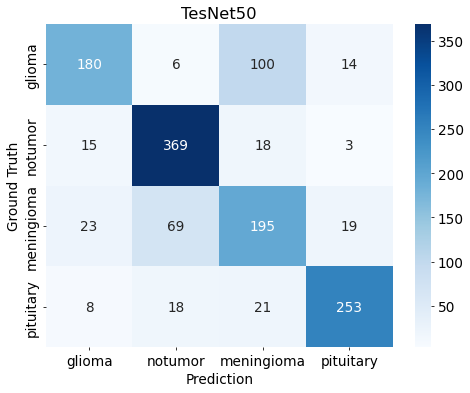

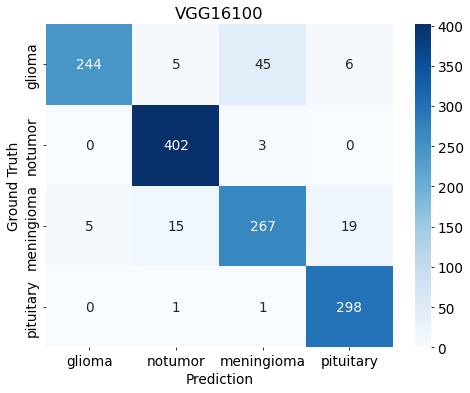

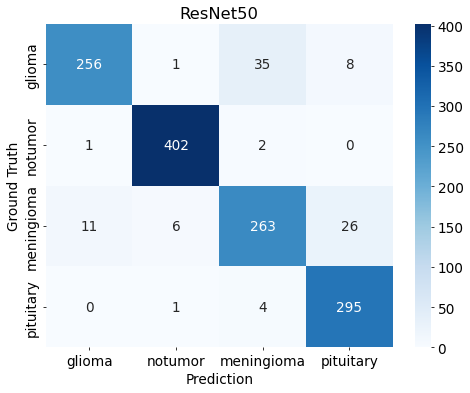

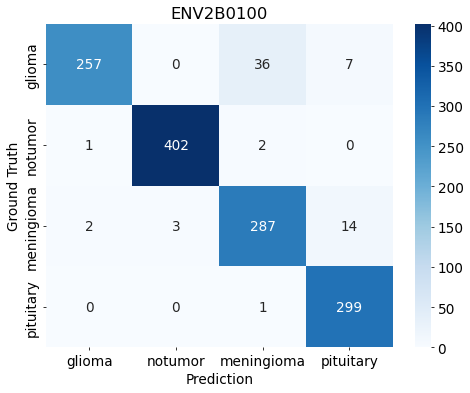

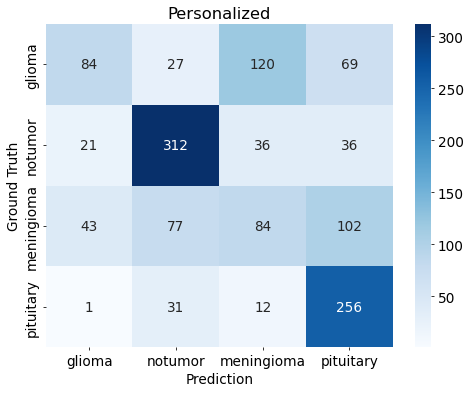

In [ ]:
cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('TesNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ResNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred4)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred5)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Personalized')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('TesNet50' + classification_report(y_true, y_pred1))
print('-------------------------------------------------------------------------')
print('VGG16100' + classification_report(y_true, y_pred2))
print('-------------------------------------------------------------------------')
print('ResNet50' + classification_report(y_true, y_pred3))
print('-------------------------------------------------------------------------')
print('ENV2B' + classification_report(y_true, y_pred4))
print('-------------------------------------------------------------------------')
print('Personalized' + classification_report(y_true, y_pred5))
print('--------------------------------------------------')

TesNet50              precision    recall  f1-score   support

           0       0.80      0.60      0.68       300
           1       0.80      0.91      0.85       405
           2       0.58      0.64      0.61       306
           3       0.88      0.84      0.86       300

    accuracy                           0.76      1311
   macro avg       0.76      0.75      0.75      1311
weighted avg       0.77      0.76      0.76      1311

-------------------------------------------------------------------------
VGG16100              precision    recall  f1-score   support

           0       0.98      0.81      0.89       300
           1       0.95      0.99      0.97       405
           2       0.84      0.87      0.86       306
           3       0.92      0.99      0.96       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.92      0.92      1311

----------------------------------------

In [ ]:
# Columnas de la tabla
t = PrettyTable(['Model', 'Accuracy', 'glioma','meningioma', 'notumor', 'pituitary'])
# To insert rows:
t.add_row(['TesNet50', 0.77,0.80,0.80,0.58,0.88])
t.add_row(['VGG16100', 0.93,0.98,0.95,0.84,0.92 ])
t.add_row(['ResNet50', 0.93,0.96,0.98,0.87,0.90])
t.add_row(['ENV2B', 0.95,0.99,0.99,0.88,0.93])
t.add_row(['Personalized', 0.55,0.56,0.70,0.33,0.55 ])
print(t)


+--------------+----------+--------+------------+---------+-----------+
|    Model     | Accuracy | glioma | meningioma | notumor | pituitary |
+--------------+----------+--------+------------+---------+-----------+
|   TesNet50   |   0.77   |  0.8   |    0.8     |   0.58  |    0.88   |
|   VGG16100   |   0.93   |  0.98  |    0.95    |   0.84  |    0.92   |
|   ResNet50   |   0.93   |  0.96  |    0.98    |   0.87  |    0.9    |
|    ENV2B     |   0.95   |  0.99  |    0.99    |   0.88  |    0.93   |
| Personalized |   0.55   |  0.56  |    0.7     |   0.33  |    0.55   |
+--------------+----------+--------+------------+---------+-----------+


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Markdown</h2>
</div>

[1]	Glickman, C Data Augmentation in Medical Images (2020) https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae [Last Access: 8 July 2024]
[2]	Karsperowicz,P OpenAI CEO Sam Altman admits his biggest fear for AI: ‘It can go quite wrong’ (2023)
https://www.foxnews.com/politics/openai-ceo-sam-altman-admits-biggest-fear-ai-can-go-quite- wrong [Last Access: 8 July 2024]

[3]	Marr, B The Problem With Biased AIs (and How To Make AI Better) (2022) https://www.forbes.com/sites/bernardmarr/2022/09/30/the-problem-with-biased-ais-and-how-to- make-ai-better/ [Last Access: 8 July 2024]

[4]	Equipo NCI( Instituto nacional del cancer) ¿Sirve la inteligencia artificial para ver el cáncer de formas nuevas y más eficaces? (2022)
https://www.cancer.gov/espanol/noticias/temas-y-relatos-blog/2022/inteligencia-artificial- imagenes-cancer [Last Access: 8 July 2024]

[5]	Equipo NCI( Instituto nacional del cancer) La inteligencia artificial acelera el diagnóstico de tumores cerebrales durante la cirugía
https://www.cancer.gov/espanol/noticias/temas-y-relatos-blog/2020/inteligencia-artificial- diagnostico-cirugia-tumores-cerebrales [Last Access: 8 July 2024]

[6]	Adit Deshpande A Beginner's Guide To Understanding Convolutional Neural Networks (2016) https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural- Networks/ [Last Access: 8 July 2024]

[7]	Lebovitz, S Diagnostic Doubt and Artificial Intelligence: An Inductive Field Study of Radiology Work (2019)https://core.ac.uk/download/pdf/301383815.pdf [Last Access: 27 June 2024]

[8]	Marr, B. Green Intelligence: Why Data And AI Must Become More Sustainable (2023) https://www.forbes.com/sites/bernardmarr/2023/03/22/green-intelligence-why-data-and-ai-must- become-more-sustainable/?sh=35b852197658 [Last Access: 25 July 2024]

[9]	Objetivo 3: Garantizar una vida sana y promover el bienestar para todos en todas las edades
https://www.un.org/sustainabledevelopment/es/health/ [Last Access: 14 June 2024]

[10]	Keras Applications
https://keras.io/api/applications/ [Last Access: 28 June 2024]

[11]	Keras https://keras.io/api/ [Last Access: 28 June 2024]

[12]	Tensorflow https://www.tensorflow.org/ [Last Access: 28 June 2024]

[13]	scikit-learn: machine learning in Python — scikit-learn 1.2.2 documentation. [En Línea] https://scikit-learn.org/ [Last Access: 17 June 2024]

[14]	Matplotlib [Online] https://matplotlib.org/ [Last Access: 4 April 2024]

[15]	Numpy [Online] https://numpy.org/ [Último acceso: 8 Junio 2023] [16]Seaborn En Línea] https://seaborn.pydata.org/ [Last Access: 4 April 2024]

[17]Google Colab [Online] https://colab.research.google.com/ [Last Access: 8 June 2024]

[18]Anaconda [Online] https://www.anaconda.com/ [Last Access: 8 June 2024] 

[19]Google drive En Línea] https://www.google.com/drive/ [Last Access: 8 June 2024]

[20]	Brownlee,   J.    How    to    Get    Reproducible    Results    with    Keras    (2017)    En Línea] https://machinelearningmastery.com/reproducible-results-neural-networks-keras/ [Last access: 8 June 2024]

[21]	Simonyan, K., & Zisserman, A. (2014, September 4).[En Línea] [1409.1556] Very Deep Convolutional Networks for Large-Scale Image Recognition. arXiv. https://arxiv.org/abs/1409.1556 [Last Access: 29 June 2024]

[22]	Zhou, V. (n.d.). Machine Learning for Beginners: An Introduction to Neural Networks. Towards Data Science. [En Línea] https://towardsdatascience.com/machine-learning-for- beginners-an-introduction-to-neural-networks-d49f22d238f9 [Last Access: 29 June 2024]

[23]	Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun [1512.03385] Deep Residual Learning for Image Recognition. (2015, December 10). arXiv. [Online] https://arxiv.org/abs/1512.03385 [Last Access: 29 June 2024]

[24]	Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun [1603.05027] Identity Mappings in Deep Residual Networks. (2016, March 16). arXiv. [Online] https://arxiv.org/abs/1603.05027 [Last Access: 29 June 2024]

[25]	Tan, M., & ., Q. V. (2021, April 1). [2104.00298] EfficientNetV2: Smaller Models and Faster Training. arXiv. Retrieved June 8, 2023. [Online] https://arxiv.org/abs/2104.00298 [Last Access: 29 June 2024]

[26]	Cai, L., Gao, J., & Zhao, D. (2020). A review of the application of deep learning in medical image classification and segmentation. Annals of translational medicine, 8(11), 713. [Online] https://doi.org/10.21037/atm.2020.02.44 [Last Access: 29 June 2024]

[27]	Kavlakoglu, E. AI vs. Machine Learning vs. Deep Learning vs. Neural Networks: What’s the Difference? (2020). [Online]

https://www.ibm.com/cloud/blog/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks [Last Access: 2 May 2024]

[28]	Matt.    Artificial   Intelligence,   Enough   of   the   hype!   What   is   it?   (2019)    [Online]	https://community.hpe.com/t5/hpe-blog-uk-ireland-middle-east/artificial-intelligence- enough-of-the-hype-what-is-it/ba-p/7046672 [Last Access: 29 Feb 2024]

[29]	Daniel, J. Convolutional Neural Networks- Deep Learning (2020) [Online] https://jackdani.medium.com/convolutional-neural-networks-deep-learning-e25ec74697ae [Last Access: 29 June 2024]

[30]	Domanska,O.   Machine   Learning   vs    Traditional    Programming    (2021)    [Online] https://www.avenga.com/magazine/machine-learning-programming/ [Last Access: 29 June 2024]

[31]	Sarvamangala, D.R., Kulkarni, R.V. Convolutional neural networks in medical image understanding: a survey. Evol. Intel. 15, 1–22 (2022). [Online] https://doi.org/10.1007/s12065- 020-00540-3 [Last Access: 29 June 2024]

[32]	Jaber, N. Can Artificial Intelligence Help See Cancer in New, and Better, Ways?
(2022) [Online]	https://www.cancer.gov/news-events/cancer-currents-blog/2022/artificial- intelligence-cancer-imaging [Last Access: 29 June 2024]

[33]	INTELIGENCIA ARTIFICIAL Y MEDICINA GENÓMICA(2022) [En Línea] https://blog.nuevamutuasanitaria.es/2022/03/22/inteligencia-artificial-y-medicina-genomica/ [Last Access: 29 June 2024]

[34]	Los ojos como reflejo de enfermedades cardiovasculares y neurológicas(2022) [En Línea] https://www.rocheplus.es/innovacion/inteligencia-artificial/el-ojo.html [Last Access: 25 July 2024]

[35]	Inteligencia artificial y cirugía: la revolución de la medicina de precisión (2020) [En Línea]	https://www.elsevier.es/en-revista-journal-healthcare-quality-research-257-articulo- inteligencia-artificial-cirugia-revolucion-medicina-S2603647920300555 [Last Access: 25 July 2024]

[36]	¿Qué es la inteligencia artificial en la medicina? [En Línea]	https://www.ibm.com/mx- es/topics/artificial-intelligence-medicine#:~:text=Adem%C3%A1s%20de%20ayudar%20a%20los,y%20presentarles%20las%2 0im%C3%A1genes%20relevantes. [Last Access: 25 July 2024]

[37]	Algunas cuestiones sobre la IA en medicina
(2023) [En Línea]	https://salud-digital.es/2023/05/11/algunas-cuestiones-sobre-la-ia-en- medicina/ [Last Access: 25 July 2024]

[38]	Brownlee, J. How to Normalize, Center, and Standardize Image Pixels in Keras (2019) [Online]
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the- imagedatagenerator-in-keras/ [Last Access: 25 July 2024]

[39]	Convolutional Neural Network: Benefits, Types, and Applications [Online] https://datagen.tech/guides/computer-vision/cnn-convolutional-neural- network/#:~:text=Benefits%20of%20Using%20CNNs%20for%20Machine%20and%20Deep%20 Learning,- Deep%20learning%20is&text=The%20CNN%20architecture%20is%20especially,and%20produ ce%20highly%20accurate%20predictions. [Last Access: 25 July 2024]

[40]	Donges, N. What Is Transfer Learning? Exploring the Popular Deep Learning Approach. (2022) [Online]	https://builtin.com/data-science/transfer-learning [Last Access: 25 July 2024]

[41]	Top 5 Programming Language for Artificial Intelligence and Deep Learning in 2023 (2022) [Online]
https://medium.com/javarevisited/top-5-programming-language-for-artificial-intelligence-ai-and- machine-learning-fccd3e6da809 [Last Access: 25 July 2024]

[42]	Kumar, A Why use Random Seed in Machine Learning? (2021) [Online] https://vitalflux.com/why-use-random-seed-in-machine-learning/ [Last Access: 25 July 2024]

[43]	Brownlee, J. Why One-Hot Encode Data in Machine Learning? (2017) [Online] https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/[Last Access: 25 July 2024]

[44]	Pramoditha, R. Encoding Categorical Variables: One-hot vs Dummy Encoding [Online] https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding- 6d5b9c46e2db [Last Access: 13 May 2024]

[45]	Brownlee, J. How to Configure Image Data Augmentation in Keras (2019) [Online]
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training- deep-learning-neural-networks/ [Last Access: 25 July 2024]

[46]	Madhugiri, D . Learn Image Augmentation Using 3 Popular Python Libraries ( 2022) [Online]
https://www.analyticsvidhya.com/blog/2022/04/image-augmentation-using-3-python-libraries/ [Last Access: 25 May 2024]
[47]	Glickman, C. Data Augmentation in Medical Images [Online] https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae	[Last Access: 25 July 2024]

[48]	ImageNet (2021) [En Línea]	https://www.image-net.org/ [Last Access: 5 April 2024]

[49]	Matsoukas, C. Haslum, J. What Makes Transfer Learning Work For Medical Images: Feature Reuse & Other Factors (2022) [Online]
https://arxiv.org/abs/2203.01825 [Last Access: 5 April 2024]

[50]	Brownlee, J Difference Between a Batch and an Epoch in a Neural Network [Online] https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/	[Last Access: 18 May 2024]

[51]	Lackshmanan, L. ML Design Pattern #2: Checkpoints [Online] https://towardsdatascience.com/ml-design-pattern-2-checkpoints- e6ca25a4c5fe#:~:text=A%20checkpoint%20is%20an%20intermediate,from%20this%20point%2 0whenever%20desired. [Last Access: 18 May 2024]

[52]	Brownlee, J. A Gentle Introduction to Dropout for Regularizing Deep Neural Networks (2018) [Online]
https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ [Last Access: 5 April 2024]

[53]	Classification:Accuracy [Online]	https://developers.google.com/machine-learning/crash- course/classification/accuracy [Last Access: 5 April 2024]

[54]	Understanding ML Evaluation Metrics — Precision & Recall (2019) [Online] https://aigraduate.com/understanding-ml-evaluation-metrics---precision---recall/ [Last Access: 5 April 2024]

[55]	Gupta, L. Precision-Recall Tradeoff in Real-World Use Cases (2021) [Online] https://medium.com/analytics-vidhya/precision-recall-tradeoff-for-real-world-use-cases- c6de4fabbcd0 [Last Access: 25 July 2024]
[56]	Consistency	training	with	supervision	[Online]	https://keras.io/examples/vision/consistency_training/ [Last Access: 25 July 2024]

[57]	Jain, M. Knowledge Distillation, aka Teacher-Student Model [Online] https://ai.plainenglish.io/knowledge-distillation-aka-teacher-student-model-4f16f701ac79 [Last Access: 25 July 2024]

[58]	Biewald, L. Deep Learning and Carbon Emissions ( 2019) [Online] https://towardsdatascience.com/deep-learning-and-carbon-emissions-79723d5bc86e	[Last Access: 25 July 2024]

[59]	Google Trends [En Línea] https://trends.google.com/trends/ [Last Access: 25 July 2024]

[60]	Brain	Tumor	MRI	Dataset	[Online] https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset [Last Access: 25 July 2024]
